In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import requests
import time
import subprocess

datestr = time.strftime('%Y%m%d')


gfs_url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25_1hr.pl?file=gfs.t00z.pgrb2.0p25.f001&lev_surface=on&var_TMP=on&leftlon=0&rightlon=360&toplat=90&bottomlat=-90&dir=%2Fgfs.'+datestr+'%2F00%2Fatmos'
r = requests.get(gfs_url, allow_redirects=True)
open('gfs.grib2', 'wb').write(r.content)

hrrr_url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_hrrr_2d.pl?file=hrrr.t00z.wrfsfcf01.grib2&lev_surface=on&var_TMP=on&leftlon=0&rightlon=360&toplat=90&bottomlat=-90&dir=%2Fhrrr.'+datestr+'%2Fconus'
r = requests.get(hrrr_url, allow_redirects=True)
open('hrrr.grib2', 'wb').write(r.content)

hrrr_ds = xr.load_dataset("hrrr.grib2", engine="cfgrib",filter_by_keys={'typeOfLevel': 'surface'})
gfs_ds = xr.load_dataset("gfs.grib2", engine="cfgrib",filter_by_keys={'typeOfLevel': 'surface'})

Ignoring index file 'hrrr.grib2.923a8.idx' older than GRIB file
Ignoring index file 'gfs.grib2.923a8.idx' older than GRIB file
Ignoring index file 'nam.grib2.923a8.idx' older than GRIB file


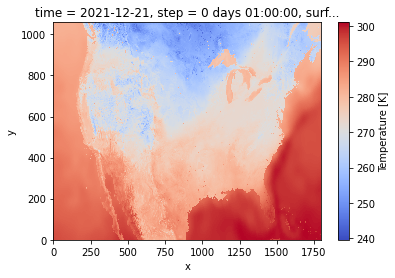

In [3]:
hrrr_ds.t.plot(cmap=plt.cm.coolwarm)

In [52]:
coord_strs = []

#delete "20"
for y in range(20,len(hrrr_ds['y'])):
    print(
    coord_str = ""
    latitude = float(hrrr_ds['latitude'][y][0])
    for x in range(len(hrrr_ds['x'])):
        longitude = float(hrrr_ds['longitude'][0][x])
        coord_str += "-lon %f %f " % (float(longitude), float(latitude))
    #coord_strs.append(coord_str)
    print(y)
   
    gfs_value_list = []
    hrrr_value_list = []

    gfs_tmp = "/usr/bin/wgrib2 %s -match '%s' %s" % ('gfs.grib2', 'TMP', coord_str)
    gfs_value = (str(subprocess.check_output(gfs_tmp, shell=True))[:-3])
    gfs_value = gfs_value.split(':')
    for z in range (len(gfs_value)):
        current_value = gfs_value[z]
        if 'val' in current_value:
            current_value = float((current_value.split(',')[2]).split('=')[1])
            gfs_value_list.append(current_value)
    
    #delete
    print('HRRR')
    
    coord_str = coord_str.split('-')
    for e in range(1,len(coord_str)):
        print(coord_str[e])
        hrrr_tmp = "/usr/bin/wgrib2 %s -match '%s' -%s" % ('hrrr.grib2', 'TMP', coord_str[e])
        hrrr_value = (str(subprocess.check_output(hrrr_tmp, shell=True))[:-3])

    #end delete
        
    hrrr_tmp = "/usr/bin/wgrib2 %s -match '%s' %s" % ('hrrr.grib2', 'TMP', coord_str)
    hrrr_value = (str(subprocess.check_output(hrrr_tmp, shell=True))[:-3])
    hrrr_value = hrrr_value.split(':')
    for z in range (len(hrrr_value)):
        current_value = hrrr_value[z]
        print(current_value)
        if 'val' in current_value:
            current_value = float((current_value.split(',')[2]).split('=')[1])
            hrrr_value_list.append(current_value)
    
#GFS_VALUE_LIST IS VALUES FOR EACH LONGITUDE FOR ONE LATITUDE
    print(len(hrrr_value_list))
        
   # THEORY: HRRR domain is not a rectangle

20
HRRR
lon 237.280472 21.636017 
lon 237.307139 21.636017 
lon 237.333810 21.636017 
lon 237.360485 21.636017 
lon 237.387165 21.636017 
lon 237.413849 21.636017 
lon 237.440537 21.636017 
lon 237.467230 21.636017 
lon 237.493927 21.636017 
lon 237.520628 21.636017 
lon 237.547334 21.636017 
lon 237.574044 21.636017 
lon 237.600758 21.636017 
lon 237.627476 21.636017 
lon 237.654199 21.636017 
lon 237.680926 21.636017 
lon 237.707658 21.636017 
lon 237.734393 21.636017 
lon 237.761133 21.636017 
lon 237.787878 21.636017 
lon 237.814626 21.636017 
lon 237.841379 21.636017 
lon 237.868136 21.636017 
lon 237.894897 21.636017 
lon 237.921663 21.636017 
lon 237.948433 21.636017 
lon 237.975207 21.636017 
lon 238.001985 21.636017 
lon 238.028768 21.636017 
lon 238.055555 21.636017 
lon 238.082346 21.636017 
lon 238.109141 21.636017 
lon 238.135941 21.636017 
lon 238.162745 21.636017 
lon 238.189553 21.636017 
lon 238.216365 21.636017 
lon 238.243182 21.636017 
lon 238.270002 21.636017 
lon 

KeyboardInterrupt: 

In [20]:
gfs_value_list = []
hrrr_value_list = []

gfs_tmp = "/usr/bin/wgrib2 %s -match '%s' %s" % ('gfs.grib2', 'TMP', coord_str)
gfs_value = (str(subprocess.check_output(gfs_tmp, shell=True))[:-3])
gfs_value = gfs_value.split(':')
for z in range (len(gfs_value)):
    current_value = gfs_value[z]
    if 'val' in current_value:
        current_value = float((current_value.split(',')[2]).split('=')[1])
        gfs_value_list.append(current_value)
    
#GFS_VALUE_LIST IS VALUES FOR EACH LONGITUDE FOR ONE LATITUDE
print(len(gfs_value_list))

1799


In [ ]:
#find all lowest coordinates for NETCDF files
#store coordinates

#cycle through coordinates and find values from each model. weight accordingly
#plot

In [ ]:
for y in range(len(hrrr_ds['y'])):
    coord_str = ""
    latitude = float(hrrr_ds['latitude'][y][0])
    for x in range(len(hrrr_ds['x'])):
        longitude = float(hrrr_ds['longitude'][0][x])
        coord_str += "-lon %f %f " % (float(longitude), float(latitude))